# Part 1 

In [1]:
## 1. Import the necessary libraries (Importieren Sie die notwendigen Bibliotheken )

In [2]:
### Disable the Python warnings
### Deaktivieren Sie die Python-Warnungen
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, classification_report, make_scorer
)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
### 2.Print first 5 row of the dataset (Geben Sie die ersten 10 Zeilen des Datensatzes aus.)
df=pd.read_csv('clean_titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,fare_category,embarked_0,...,who_1,who_2,deck_0,deck_1,deck_2,deck_3,deck_4,deck_5,deck_6,deck_7
0,0,2,1,22,1,0,7,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,38,1,0,71,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,1,2,0,26,0,0,7,1,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,35,1,0,53,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,2,1,35,0,0,8,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [5]:
### 3. Print the names of the columns.
### Drucken Sie die Namen der Spalten aus

In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'alone',
       'fare_category', 'embarked_0', 'embarked_1', 'embarked_2', 'who_0',
       'who_1', 'who_2', 'deck_0', 'deck_1', 'deck_2', 'deck_3', 'deck_4',
       'deck_5', 'deck_6', 'deck_7'],
      dtype='object')

In [7]:
### 4. The 'Survived' column is the target column.
### Die Spalte 'Survived' ist die Zielvariable.

# Part 2 

### 1. Split the data into four pieces: train_x, test_x, train_y, and test_y . (The target value is the 'Survived')
## Teilen Sie die Daten in vier Teile auf: train_x, test_x, train_y und test_y. ('Der Zielwert ist die 'Survived')

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('survived', axis=1)
y = df[["survived"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

In [9]:
column_names=X_train.columns

In [10]:
### 1 Activate the code below and analyze the values of the 'Survived' column
### Aktivieren Sie den untenstehenden Code und analysieren Sie die Werte der Spalte 'Survived'

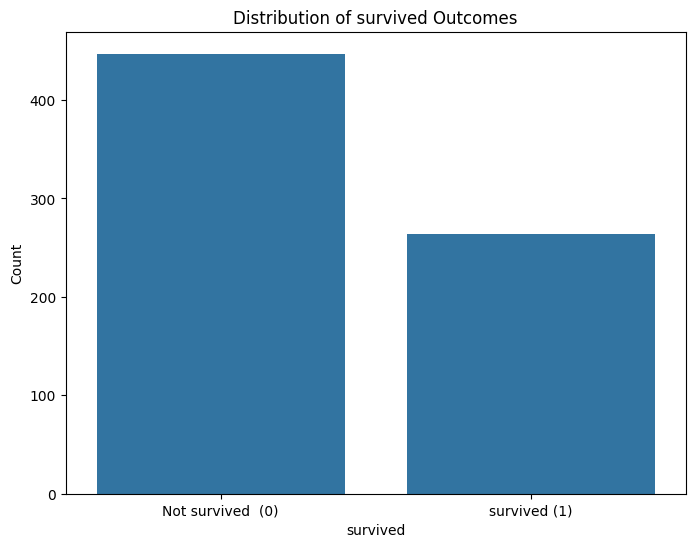

In [11]:
outcome_counts = y_train['survived'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.title('Distribution of survived Outcomes')
plt.xlabel('survived')
plt.ylabel('Count')
plt.xticks([0, 1], [ 'Not survived  (0)', 'survived (1)'])
plt.show()

In [12]:
### Use the SMOTE library to balance the 'Survived' column
### Verwenden Sie die SMOTE-Bibliothek, um die Spalte 'Survived' auszugleichen.
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [13]:
### GridSearchCV
### Use the GridSearchCV method to find the best parameters and train the model
### Verwenden Sie die Methode GridSearchCV, um die besten Parameter zu finden und das Modell zu trainieren

In [14]:
param_grid = {
    'C': [0.001, 0.011, 0.01, 0.03, 0.05, 0.1,  0.2, 0.5,1, 10, 100, 500, 1000],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_lr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}


# Part 3 

In [15]:
### Cross validation
### Use the cross-validation method to analyze the machine learning model's score on the training dataset.
###  Verwenden Sie die Kreuzvalidierungsmethode, um die Punktzahl des maschinellen Lernmodells auf dem Trainingsdatensatz zu analysieren

In [16]:
train_scores = {
    'accuracy': cross_val_score(best_lr, X_train, y_train, cv=5, scoring='accuracy').mean(),
    'precision': cross_val_score(best_lr, X_train, y_train, cv=5, scoring='precision').mean(),
    'recall': cross_val_score(best_lr, X_train, y_train, cv=5, scoring='recall').mean(),
    'f1': cross_val_score(best_lr, X_train, y_train, cv=5, scoring='f1').mean(),
    'roc_auc': cross_val_score(best_lr, X_train, y_train, cv=5, scoring='roc_auc').mean()
}
print("Training Set Evaluation Metrics:")
for metric, score in train_scores.items():
    print(f"{metric.capitalize()}: {score:.4f}")

Training Set Evaluation Metrics:
Accuracy: 0.8367
Precision: 0.8508
Recall: 0.8235
F1: 0.8344
Roc_auc: 0.8967


In [17]:
###  Check the model's score on the test dataset
### Überprüfen Sie die Punktzahl des Modells auf dem Testdatensatz

In [18]:
y_pred = best_lr.predict(X_test)
test_scores = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred),
    'roc_auc': roc_auc_score(y_test, best_lr.predict_proba(X_test)[:, 1])
}
print("\nTest Set Evaluation Metrics:")
for metric, score in test_scores.items():
    print(f"{metric.capitalize()}: {score:.4f}")


Test Set Evaluation Metrics:
Accuracy: 0.7753
Precision: 0.7432
Recall: 0.7237
F1: 0.7333
Roc_auc: 0.8237


In [19]:
### Examine the confusion matrix and analyze where the model makes more mistakes
###  Betrachten Sie die Verwechslungsmatrix und analysieren Sie, wo das Modell mehr Fehler macht

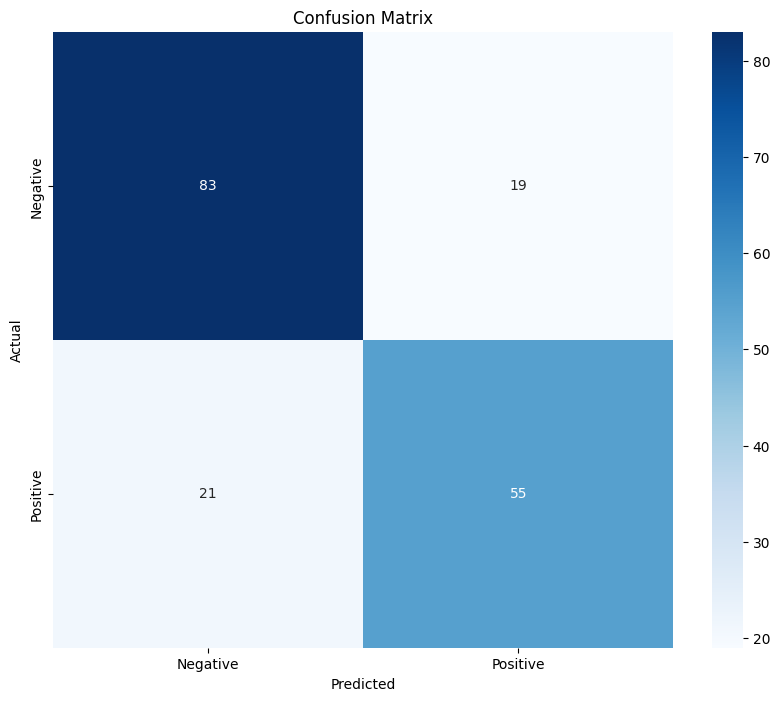

In [20]:
# Compute confusion matrix
cm_pred = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_pred, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()  

In [21]:
### Discuss in the group whether we should increase or decrease the threshold.
### Diskutieren Sie in der Gruppe, ob wir den Schwellenwert erhöhen oder verringern sollten.

In [22]:
new_threshold = 0.4
probabilities = best_lr.predict_proba(X_test)[:, 1] # Probabilities for the positive class
new_predictions = (probabilities >= new_threshold).astype(int)
print(classification_report(y_test, new_predictions))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       102
           1       0.67      0.79      0.72        76

    accuracy                           0.74       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.75      0.74      0.74       178



In [23]:
### Use the permutation_importance function to analyze which information is important for making predictions.
###  Verwenden Sie die Funktion zur permutation_importance, um zu analysieren, welche Informationen für die Vorhersage wichtig sind.

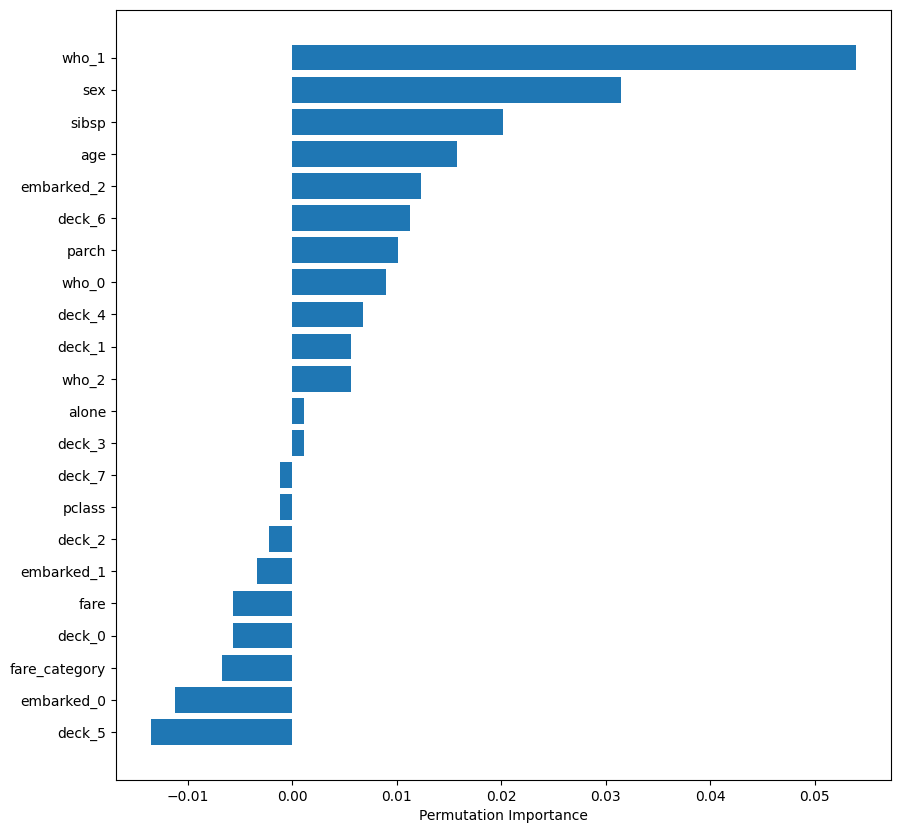

In [25]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(best_lr, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()